In [421]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [422]:
#Import Soccer Libraries
from statsbombpy import sb
import mplsoccer as mpl
from kloppy import metrica

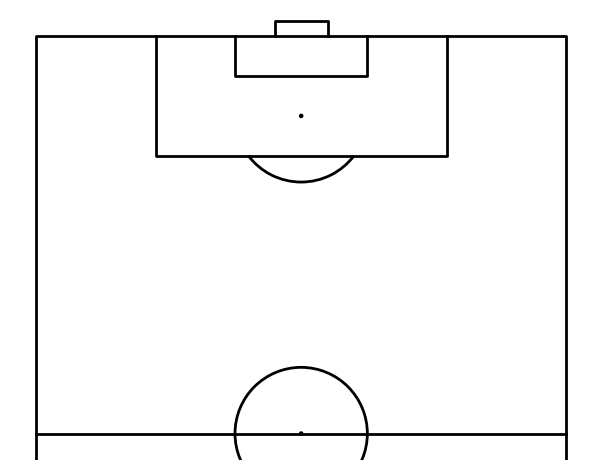

In [423]:
from mplsoccer import FontManager
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')
pitch = mpl.VerticalPitch(half = True, pitch_color = "white", line_color="black", goal_type = "box")
fig, ax = pitch.draw()

In [424]:
#Load Open StatsBomb Data
data = sb.competitions()

In [425]:
data

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
65,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
66,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
67,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
68,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [426]:
#Seeing if the 2020 Euro above is the only Euro Competition Available
data.loc[data["competition_name"] == 'UEFA Euro']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
65,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979


In [427]:
# I Chose to work on the Euro 2020
euro2020 = sb.matches(competition_id=55, season_id=43)
euro2020.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3795108,2021-07-02,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Spain,1,1,available,...,2023-04-27T21:55:08.695971,5,Quarter-finals,Saint-Petersburg Stadium,Michael Oliver,Vladimir Petković,Luis Enrique Martínez García,1.1.0,2,2
1,3788769,2021-06-21,21:00:00.000,Europe - UEFA Euro,2020,Russia,Denmark,1,4,available,...,2023-04-27T22:20:21.686564,3,Group Stage,Parken,Clément Turpin,Stanislav Cherchesov,Kasper Hjulmand,1.1.0,2,2
2,3788766,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Italy,Wales,1,0,available,...,2023-04-27T22:22:42.769375,3,Group Stage,Estadio Olímpico,Ovidiu Alin Hațegan,Roberto Mancini,Robert Page,1.1.0,2,2
3,3795220,2021-07-06,21:00:00.000,Europe - UEFA Euro,2020,Italy,Spain,1,1,available,...,2022-08-04T12:00,6,Semi-finals,Wembley Stadium,Felix Brych,Roberto Mancini,Luis Enrique Martínez García,1.1.0,2,2
4,3788761,2021-06-18,15:00:00.000,Europe - UEFA Euro,2020,Sweden,Slovakia,1,0,available,...,2023-04-27T22:28:52.986485,2,Group Stage,Saint-Petersburg Stadium,Daniel Siebert,Jan Olof Andersson,Štefan Tarkovič,1.1.0,2,2


In [428]:
euro2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               51 non-null     int64 
 1   match_date             51 non-null     object
 2   kick_off               51 non-null     object
 3   competition            51 non-null     object
 4   season                 51 non-null     object
 5   home_team              51 non-null     object
 6   away_team              51 non-null     object
 7   home_score             51 non-null     int64 
 8   away_score             51 non-null     int64 
 9   match_status           51 non-null     object
 10  match_status_360       51 non-null     object
 11  last_updated           51 non-null     object
 12  last_updated_360       51 non-null     object
 13  match_week             51 non-null     int64 
 14  competition_stage      51 non-null     object
 15  stadium                51

In [429]:
#Sort Tournament by proper order of when the matches took place
euro2020 = euro2020.sort_values('match_id')
euro2020.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
12,3788741,2021-06-11,21:00:00.000,Europe - UEFA Euro,2020,Turkey,Italy,0,3,available,...,2023-04-27T22:38:34.970148,1,Group Stage,Estadio Olímpico,Danny Desmond Makkelie,Şenol Güneş,Roberto Mancini,1.1.0,2,2
46,3788742,2021-06-12,18:00:00.000,Europe - UEFA Euro,2020,Denmark,Finland,0,1,available,...,2022-08-04T12:00,1,Group Stage,Parken,Anthony Taylor,Kasper Hjulmand,Markku Kanerva,1.1.0,2,2
49,3788743,2021-06-12,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Russia,3,0,available,...,2023-04-27T22:37:57.086496,1,Group Stage,Saint-Petersburg Stadium,Antonio Miguel Mateu Lahoz,Roberto Martínez Montoliú,Stanislav Cherchesov,1.1.0,2,2
50,3788744,2021-06-12,15:00:00.000,Europe - UEFA Euro,2020,Wales,Switzerland,1,1,available,...,2023-04-27T22:37:26.160124,1,Group Stage,Bakı Olimpiya Stadionu,Clément Turpin,Robert Page,Vladimir Petković,1.1.0,2,2
33,3788745,2021-06-13,15:00:00.000,Europe - UEFA Euro,2020,England,Croatia,1,0,available,...,2022-08-04T12:00,1,Group Stage,Wembley Stadium,Daniele Orsato,Gareth Southgate,Zlatko Dalić,1.1.0,2,2


In [430]:
#Summarize Results of Tournament
print(euro2020.apply(lambda row: f'The {row["competition_stage"]} match between {row["home_team"]} and {row["away_team"]} finished {row["home_score"]} : {row["away_score"]}', axis=1))

12                   The Group Stage match between Turkey and Italy finished 0 : 3
46                The Group Stage match between Denmark and Finland finished 0 : 1
49                 The Group Stage match between Belgium and Russia finished 3 : 0
50              The Group Stage match between Wales and Switzerland finished 1 : 1
33                The Group Stage match between England and Croatia finished 1 : 0
37            The Group Stage match between Netherlands and Ukraine finished 3 : 2
11        The Group Stage match between Austria and North Macedonia finished 3 : 1
43        The Group Stage match between Scotland and Czech Republic finished 0 : 2
41                The Group Stage match between Poland and Slovakia finished 1 : 2
42                   The Group Stage match between Spain and Sweden finished 0 : 0
44                 The Group Stage match between France and Germany finished 1 : 0
45               The Group Stage match between Hungary and Portugal finished 0 : 3
27  

In [431]:
final =euro2020[euro2020['competition_stage'] == 'Final'].iloc[0]
final

match_id                                 3795506
match_date                            2021-07-11
kick_off                            21:00:00.000
competition                   Europe - UEFA Euro
season                                      2020
home_team                                  Italy
away_team                                England
home_score                                     1
away_score                                     1
match_status                           available
match_status_360                       available
last_updated             2021-07-12T12:27:50.647
last_updated_360                2022-08-04T12:00
match_week                                     7
competition_stage                          Final
stadium                          Wembley Stadium
referee                            Björn Kuipers
home_managers                    Roberto Mancini
away_managers                   Gareth Southgate
data_version                               1.1.0
shot_fidelity_versio

In [432]:
match_id = final['match_id']
events = sb.events(match_id = match_id)
events.head()

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id': 7036, 'name': 'Gianluigi Donnarumma'}, 'position...",Italy,914,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id': 3468, 'name': 'Jordan Pickford'}, 'position': {...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Italy,914,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [433]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ball_receipt_outcome              185 non-null    object 
 1   ball_recovery_recovery_failure    10 non-null     object 
 2   carry_end_location                1106 non-null   object 
 3   clearance_aerial_won              16 non-null     object 
 4   clearance_body_part               39 non-null     object 
 5   clearance_head                    21 non-null     object 
 6   clearance_left_foot               4 non-null      object 
 7   clearance_right_foot              14 non-null     object 
 8   counterpress                      117 non-null    object 
 9   dribble_nutmeg                    3 non-null      object 
 10  dribble_outcome                   51 non-null     object 
 11  dribble_overrun                   5 non-null      object 
 12  duel_o

In [434]:
events['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Duel', 'Block', 'Interception', 'Clearance', 'Shot',
       'Goal Keeper', 'Dribble', 'Foul Committed', 'Ball Recovery',
       'Dispossessed', 'Foul Won', 'Miscontrol', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Half End',
       'Substitution', 'Tactical Shift', 'Referee Ball-Drop'],
      dtype=object)

In [435]:
shots = events[events['type'] == 'Shot']
pen = shots[shots['shot_type'] == 'Penalty']

In [436]:
pen = pen[['team', 'player','minute','shot_type','shot_outcome']]
pen

,team,player,minute,shot_type,shot_outcome
4381,Italy,Domenico Berardi,120,Penalty,Goal
4382,England,Harry Kane,120,Penalty,Goal
4383,Italy,Andrea Belotti,121,Penalty,Saved
4384,England,Harry Maguire,122,Penalty,Goal
4385,Italy,Leonardo Bonucci,123,Penalty,Goal
4386,England,Marcus Rashford,124,Penalty,Post
4387,Italy,Federico Bernardeschi,125,Penalty,Goal
4388,England,Jadon Sancho,125,Penalty,Saved
4389,Italy,Jorge Luiz Frello Filho,126,Penalty,Saved to Post
4390,England,Bukayo Saka,127,Penalty,Saved


In [437]:
#Final Score after Penalty Shootout
pen[['team','shot_outcome']].groupby('team').value_counts()

team     shot_outcome 
England  Goal             2
         Saved            2
         Post             1
Italy    Goal             3
         Saved            1
         Saved to Post    1
dtype: int64

In [438]:
#Separate Italy Shots & England Shots
shots_italy = shots[(shots['shot_type'] != 'Penalty') &
              (shots['team'] == 'Italy')]
shots_england = shots[(shots['shot_type'] != 'Penalty') &
                (shots['team'] == 'England')]
shots_england

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
4356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Half Volley,Open Play,NaN,NaN,NaN,England,768,00:01:57.240,Shot,NaN
4365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Normal,Open Play,NaN,NaN,NaN,England,768,00:10:38.608,Shot,True
4369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Normal,Open Play,NaN,NaN,NaN,England,768,00:18:13.282,Shot,True
4373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Half Volley,Open Play,NaN,NaN,NaN,England,768,00:39:36.638,Shot,NaN
4374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Half Volley,Open Play,NaN,NaN,NaN,England,768,00:06:10.047,Shot,NaN
4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Half Volley,Open Play,NaN,NaN,NaN,England,768,00:02:31.638,Shot,True


In [439]:
italy_x, italy_y = np.array(shots_italy['location'].tolist()).T
italy_xg = np.array(shots_italy['shot_statsbomb_xg'].tolist())
italy_goal = ['green' if g == "Goal" else 'red' for g in shots_italy['shot_outcome'].to_list()]

england_x, england_y = np.array(shots_england['location'].tolist()).T
england_xg = np.array(shots_england['shot_statsbomb_xg'].tolist())
england_goal = ['green' if g == "Goal" else 'red' for g in shots_england['shot_outcome'].to_list()]

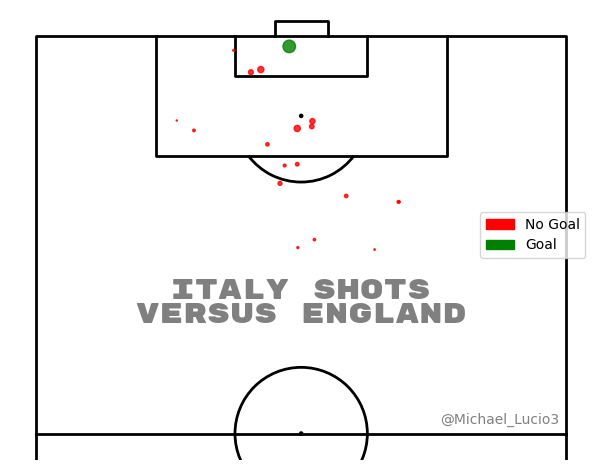

In [507]:
import matplotlib.patches as mpatches
pitch = mpl.VerticalPitch(half = True, pitch_color = "white", line_color="black", goal_type = "box")
fig, ax = pitch.draw()
italy_shot_map = pitch.scatter(italy_x, italy_y, s=italy_xg*100, c=italy_goal, alpha=0.8, ax=ax)

txt = ax.text(x=40, y=80, s='Italy Shots\nVersus England',
              size=20,
              fontproperties=fm_rubik.prop, color='grey',
              va='center', ha='center')

ax.text(79, 62, '@Michael_Lucio3', color='grey',
                    va='center', ha='right', fontsize=10)

red_patch = mpatches.Patch(color='red', label='No Goal')
green_patch = mpatches.Patch(color='green', label='Goal')
ax.legend(handles=[red_patch, green_patch])

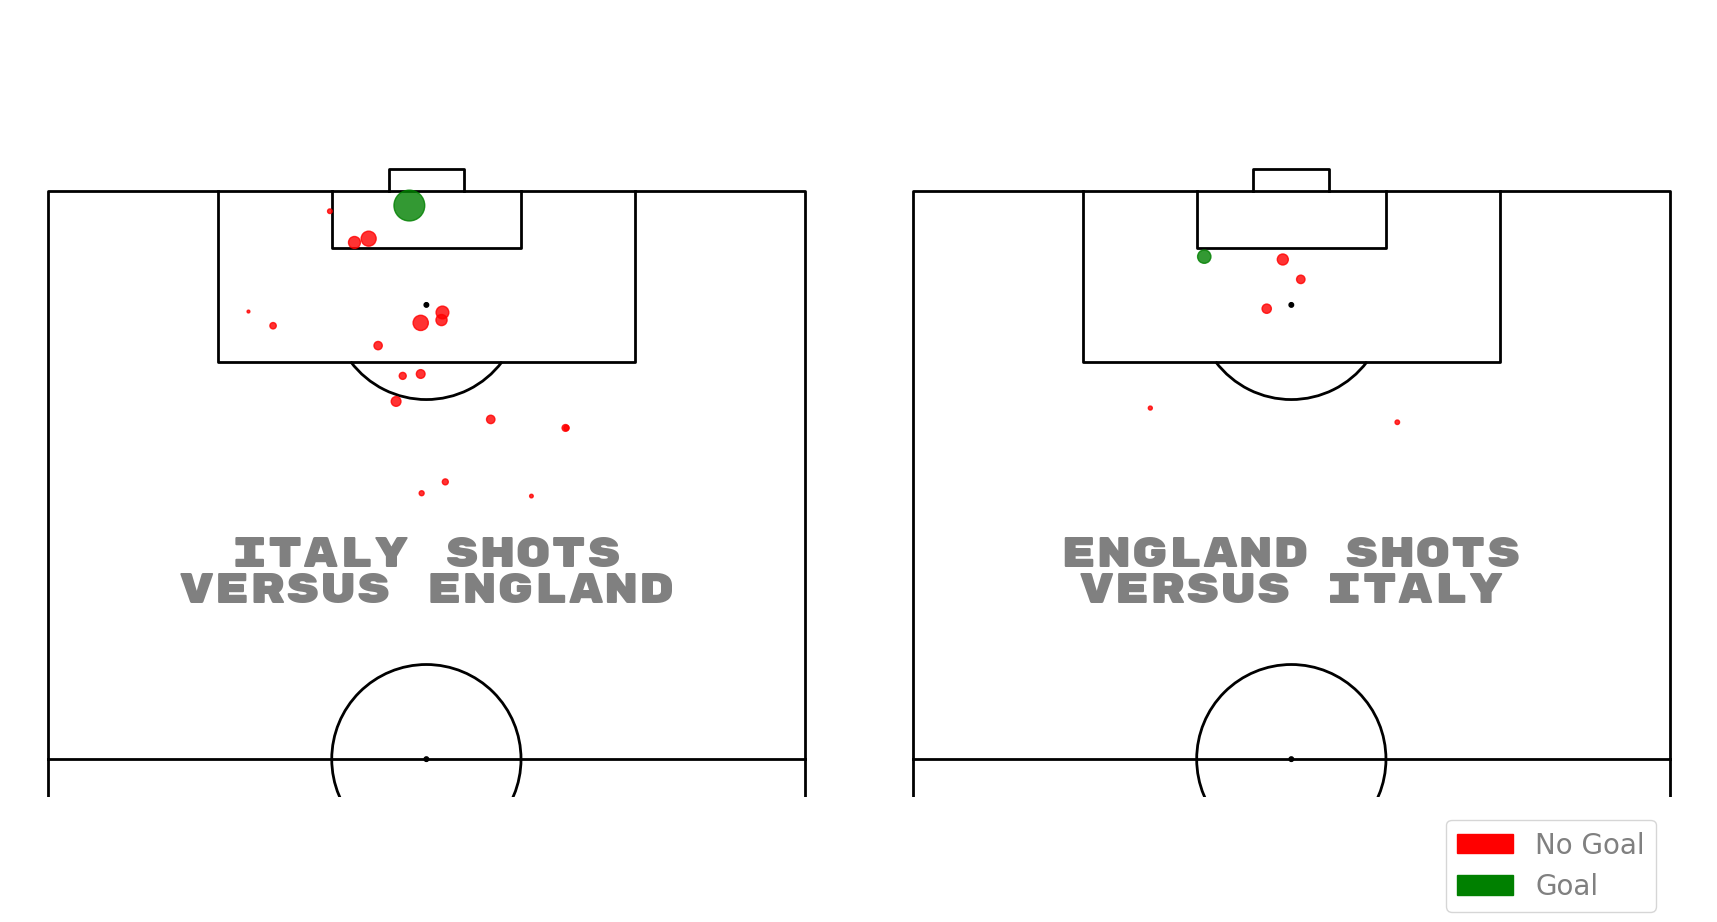

In [554]:
fig, ax = pitch.grid(ncols=2, axis=False, endnote_space=0.01)
italy_shot_map = pitch.scatter(italy_x, italy_y, s=italy_xg*600, c=italy_goal, alpha=0.8, ax=ax['pitch'][0])
england_shot_map = pitch.scatter(england_x,england_y, s = england_xg*600, c = england_goal, alpha=0.8,ax=ax['pitch'][1])

ax['pitch'][0].text(40, 80, s='Italy Shots\nVersus England', ha='center', va='center', color='grey', fontproperties=fm_rubik.prop, fontsize=30)
ax['pitch'][1].text(40, 80, s='England Shots\nVersus Italy', ha='center', va='center', color='grey', fontproperties=fm_rubik.prop, fontsize=30)
#ax['endnote'].legend(['red', 'green'], ['No Goal', 'Goal'],loc='right')
red_patch = mpatches.Patch(color='red', label='No Goal')
green_patch = mpatches.Patch(color='green', label='Goal')
ax['endnote'].legend(handles=[red_patch, green_patch],fontsize = 20, labelcolor = 'grey')